In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
pd.set_option('display.max_colwidth', None)

In [2]:
file=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [3]:
details=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [4]:
details

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data Description:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,ID,Customer ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Age,Customer's age in completed years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Experience,#years of professional experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Income,Annual income of the customer ($000),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
file = file.drop('Experience', axis=1)
index = file[["ID"]]
file = file.drop('ID', axis=1)

In [6]:
y=file['Personal Loan']

In [7]:
X=file.drop('Personal Loan', axis='columns')

In [8]:
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders
%matplotlib inline

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [11]:

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4000, 11) (4000,)
Test (1000, 11) (1000,)


In [12]:
print(X_train)

      Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
868    40     161     94596       2    3.3          1         0   
936    62      19     92109       1    1.5          3         0   
4034   35      82     94022       2    1.7          2         0   
1923   45      22     90639       1    0.2          1         0   
3330   34      32     95054       4    1.1          3         0   
...   ...     ...       ...     ...    ...        ...       ...   
3335   35     118     92069       2    7.8          1       358   
1099   30      52     92717       3    0.7          2         0   
2514   41      25     92182       2    0.1          2        91   
3606   43       9     96145       2    0.0          3        96   
2575   42      41     90401       3    0.5          3         0   

      Securities Account  CD Account  Online  CreditCard  
868                    1           0       0           1  
936                    1           0       0           0  
4034              

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [16]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(recall_score(y_test, y_pred))

In [17]:
maxs = max(scores)
maxs_idx = scores.index(maxs)

In [18]:
print(f"Accuracy Score: {maxs} with n_estimators: {maxs_idx}")

Accuracy Score: 0.8901098901098901 with n_estimators: 4


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
n_estimators = [10, 12, 50, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [2,5,10,20]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882614 using {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
0.177148 (0.141027) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}
0.162573 (0.116903) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 12}
0.127598 (0.063222) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 50}
0.112146 (0.059291) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
0.113068 (0.049751) with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 1000}
0.218264 (0.126741) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}
0.165317 (0.113203) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 12}
0.151439 (0.075111) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 50}
0.131264 (0.076061) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 100}
0.122515 (0.048026) with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 1000}
0.759244 (0.069797) with: {'max_depth': 

In [88]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 30, 100, None],
    'max_features': ['auto', 2, 3],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 12],
    'n_estimators': [12,50]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='recall')


#grid_m_re = GridSearchCV(m, param_grid = grid_values, scoring = 'recall')

In [102]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan n

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 30, 100, None],
                         'max_features': ['auto', 2, 3],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 12],
                         'n_estimators': [12, 50]},
             scoring='recall', verbose=2)

In [103]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, n_estimators=12)

In [ ]:
Best: 0.881804 using {'max_features': 'log2', 'n_estimators': 100}

In [42]:
RF_model = RandomForestClassifier(n_estimators=100, max_features='log2',oob_score=True, max_depth=10)

In [43]:
RF_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=1000, oob_score=True,
                       random_state=42)

In [44]:
predictions=RF_model.predict(X_test)

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3566 to 4121
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   Income              1000 non-null   int64  
 2   ZIP Code            1000 non-null   int64  
 3   Family              1000 non-null   int64  
 4   CCAvg               1000 non-null   float64
 5   Education           1000 non-null   int64  
 6   Mortgage            1000 non-null   int64  
 7   Securities Account  1000 non-null   int64  
 8   CD Account          1000 non-null   int64  
 9   Online              1000 non-null   int64  
 10  CreditCard          1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 93.8 KB


In [46]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       909\n           1       0.99      0.85      0.91        91\n\n    accuracy                           0.98      1000\n   macro avg       0.99      0.92      0.95      1000\nweighted avg       0.99      0.98      0.98      1000\n'

In [47]:

confusion_matrix(y_test,predictions)

array([[908,   1],
       [ 14,  77]])

In [48]:
accuracy_score(y_test,predictions)

0.985

In [49]:
print('The Precision Score- What proportion of positive identifications was actually correct?: ' + str(100*precision_score(y_test,predictions))+'%')
print('The Recall Score - What proportion of actual positives was identified correctly?: ' + str(100*recall_score(y_test,predictions))+'%')

The Precision Score- What proportion of positive identifications was actually correct?: 98.71794871794873%
The Recall Score - What proportion of actual positives was identified correctly?: 84.61538461538461%


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X_train, y_train, cv=15)
print('Cross-Validation Accuracy Scores', scores.mean())
recall = cross_val_score(RF_model, X_train, y_train, cv=15, scoring='recall')
print('Recall', recall.mean())
precision = cross_val_score(RF_model, X_train, y_train, cv=15, scoring='precision')
print('Precision', precision.mean())

Cross-Validation Accuracy Scores 0.9862493311931516
Recall 0.8740512820512822
Precision 0.9833983649201042


# Accuracy: 98.65%
# Precision 97.81%
# Recall: 88.17%

# 
# 
# 

# 
# 


In [34]:
importances = RF_model.feature_importances_

In [35]:
RF_model.feature_importances_

array([0.04107678, 0.35292469, 0.03558795, 0.11178825, 0.1595803 ,
       0.19734098, 0.03343127, 0.00431073, 0.04922846, 0.00673384,
       0.00799673])

<AxesSubplot:>

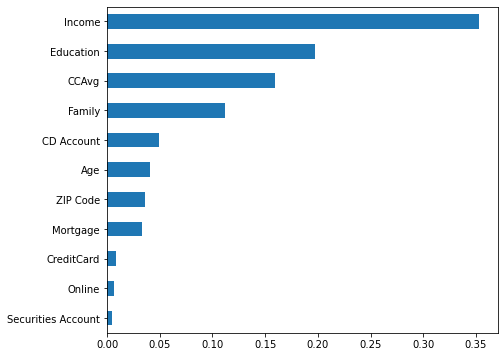

In [36]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [37]:
from sklearn.inspection import plot_partial_dependence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


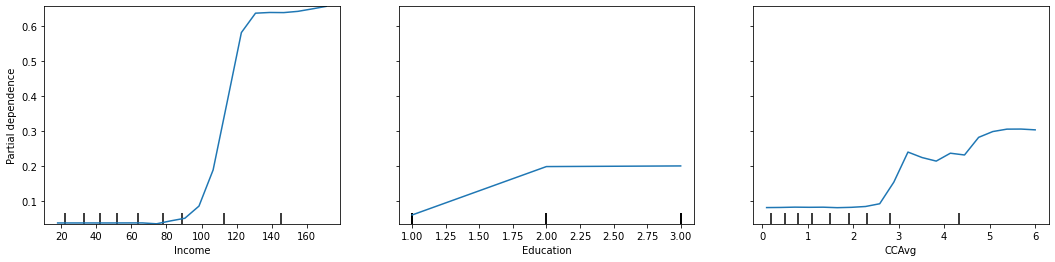

In [38]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Income', "Education", "CCAvg"], 
                        grid_resolution=20, ax=ax)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


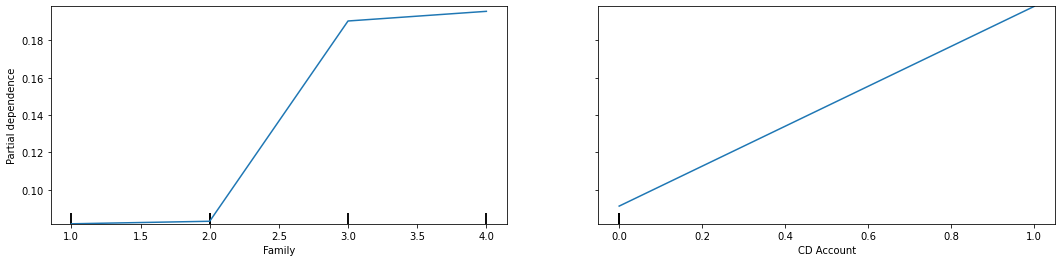

In [39]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Family', 'CD Account'], 
                        grid_resolution=20, ax=ax)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


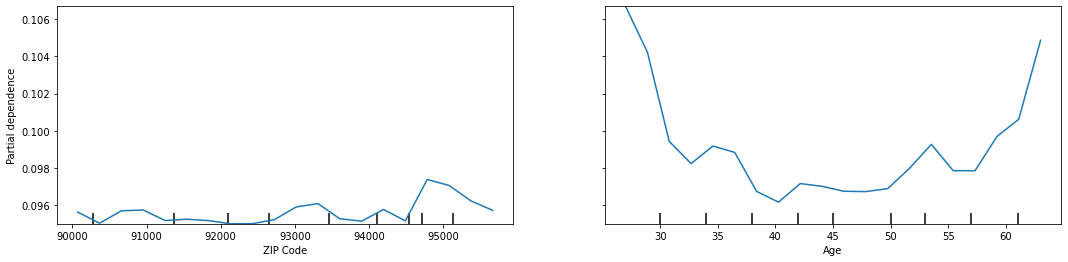

In [40]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['ZIP Code', 'Age'], 
                        grid_resolution=20, ax=ax)